# Homework 7: Regexes and Structured Data (31 points)

name: Ningyuan Wang

email: wningyua@umich.edu

This homework assignment took me 12 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

## Collaboration Disclosure

In the cell below, please list *everyone* with whom you discussed any of the homework problems, excluding only the GSIs and the course instructor. 

If you did not discuss the homework with anyone else, write __"I did not discuss this homework with anyone."__

Even if you discuss questions with other, the code you submit must be only yours. All work is checked with the [MOSS plagiarism detector](https://theory.stanford.edu/~aiken/moss/).)

I discussed 1.3, 3.1, 3.3 with Ming-chen Lu. 

## Submission Instructions
Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. Before submitting, please make sure make sure __Cells->Run__ executes without errors; errors in your code cause problems for our auto-grader. Thus, even though we may ask you to check for errors in your functions, you should not include in your submission any examples of your functions actually raising those errors.

## Nbgrader

We will be using `nbgrader` to grade your jupyter notebook. Additional tests will be used at grading time, you are encouraged to read the problem carefully and verify your code covers all appropriate cases.

**Be careful:** If a jupyter notebook cell takes longer than `60s` to run, the autograder will not grade it and you will receive zero credit for that question.

## Error checking

You do not need to do error checking (raising errors, etc.) in your code unless we explicitly ask you to so in a problem.

## Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking:

In [507]:
%load_ext pycodestyle_magic
%flake8_on --ignore E266 --max_line_length=99

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


## 1 Regular Expressions: Warmup (10 points)

In this problem, you'll get practice with basic regular expressions. Pay particular attention to edge cases such as the empty string and single-character strings when writing your regexes. At the URL http://www.greenteapress.com/thinkpython/code/words.txt is a list of about 100,000 English words.

**Note:** For this problem, you can assume all characters/words are lower-case. 

### Part 1 (1 point) 
Use the `urllib` python module to open the URL and read the file, and produce a list named `ascii_list` of ASCII strings so that each line of the file corresponds to an element of the list. 

**Note:** You will likely need to convert the raw bytes read from the webpage to ASCII characters, for which you should see the documentation for the string methods `encode` and `decode`. How many words are in the file?

In [508]:
import urllib.request
import re

ascii_list = []
response = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt')
for w in response:
    w = w.decode('ascii')
    w = w.encode("utf8")
    ascii_list.append(w.rstrip())
# len(ascii_list)

In [509]:
assert type(ascii_list) == list, "Variable ascii_list does not \
                                  exist or not a list."
assert ascii_list[0] == b'aa'

### Part 2 (1 point) 
It is a good habit to always look at your data to check that it makes sense. Have a look at the words in the list. Does anything jump out at you? 

**Note:** I am not requiring you to do anything specific, here. Just look at the data!

In [510]:
# Use this cell to look at the data.
# print(ascii_list)

In [511]:
assert True

### Part 3 (2 points)
Write a regular expression that matches any string containing exactly three consecutive vowels. Compile this regular expression, and assign it to a variable called `three_consecutive_vowels`. 

Use this regex to determine how many words from the list contain exactly three consecutive vowels. For the purposes of this **specific** subproblem, the vowels are "a, e, i, o, u". All other letters are consonants. Produce a list `q1_3` of all such words.

In [512]:
# Write your code to create the regex and the list here.
# YOUR CODE HERE
# three_consecutive_vowels = re.compile(r'[aeiou]{3}')
three_consecutive_vowels = re.compile(r"""(^([^aeiou]*|[a-z]*[^aeiou]))"""
                                      """[aeiou]{3}([^aeiou]*|[^aeiou][a-z]*)$""")
# q1_3 = [w.decode("utf-8") for w in ascii_list if re.search(three_consecutive_vowels, str(w))]
q1_3 = ([w.decode() for w in ascii_list if re.search(three_consecutive_vowels, w.decode())])
len(q1_3)

1326

In [513]:
assert q1_3[0] == 'aboideau'
assert q1_3[-1] == 'zouaves'

In [514]:
assert three_consecutive_vowels.match("aei").group(0) == "aei"

### Part 4  (2 point) 
Write a regular expression that matches any string that contains no instances of the letter e. Compile this regular expression, and assign it to a variable called `gadsby`. ("Gadsby" is the title of an English novel written in the 1930s that contains __almost__ no instances of the letter "e"). 

How many words in the list do not contain the letter "e"? Enter your answer as a variable called `num_words_no_e`.

In [515]:
# Create your variable 'gadsby' here.
# YOUR CODE HERE
gadsby = re.compile(r'^[^e]*$')
num_words_no_e = len([w for w in ascii_list if re.search(gadsby, w.decode())])
num_words_no_e

37641

In [516]:
assert gadsby.match("stats").group(0) == 'stats'
assert gadsby.match("state") is None

In [517]:
assert type(num_words_no_e) == int
assert num_words_no_e > 0

### Part 5 (2 points)

Write a regular expression that matches any string that begins and ends with a consonant and has no consonants in between. 
For the purposes of this __specific__ subproblem, "y" is neither consonant nor vowel, so consonants are the 20 letters that are not one of "a, e, i, o, u, y" and vowels are "a, e, i, o, u". 

The words need not begin and end with the _same_ consonant, so 'door' is a valid match. Compile this regular expression, and assign it to a variable called `consonant_consonant`. 

How many words begin and end with a consonant with no consonants in between? Assign this answer to a variable `num_words_consonants`

In [518]:
# create your variables 'consonant_consonant' and `num_words_consonants` here.
# YOUR CODE HERE

consonant_consonant = re.compile(r'^[^aeiouy][aeiouy]*[^aeiouy]$')
num_words_consonants = len([w for w in ascii_list if re.search(consonant_consonant, w.decode())])
num_words_consonants


1230

In [519]:
assert consonant_consonant.match("door").group(0) == 'door'
assert consonant_consonant.match("bb").group(0) == "bb"
assert consonant_consonant.match("aaabaaa") is None
assert consonant_consonant.match("stats") is None
assert consonant_consonant.match("by") is None

In [520]:
assert type(num_words_consonants) == int
assert num_words_consonants > 0

### Part 6  (2 points)
Write a regular expression that matches any string whose last two characters are the first two characters in reverse order. So, for example, your regex should match "repeater" and "stats", but not "neoprene". Compile this regular expression and assign it to a variable called `bookends`. 

How many words in the list have this property? Assign this number to a variable `num_words_bookends`

__Note:__ Your regex should NOT match cases where the word has a length of 3 or less. 

In [521]:
# YOUR CODE HERE
bookends = re.compile(r'^([a-z])([a-z]).*\2\1$')
num_words_bookends = len([w for w in ascii_list if re.search(bookends, w.decode())])
num_words_bookends

840

In [522]:
assert bookends.match("repeater").group(0) == 'repeater'
assert bookends.match("stats").group(0) == 'stats'
assert bookends.match("fallinaf").group(0) == 'fallinaf'

assert bookends.match("neoprene") is None
assert bookends.match("afa") is None

In [523]:
assert num_words_bookends > 0
assert type(num_words_bookends) == int

## 2 Exploring Internet Traffic with Regexes (6 points)

In this problem, you'll get a taste of a more realistic application of regular expressions. The file `SkypeIRC.txt` (which was included along with this homework in `hw7.zip`) contains data generated by web traffic associated with Skype and IRC, captured using the Wireshark program, a common tool for analyzing web traffic. 

### Part 1 (1 point) 

Open the file `SkypeIRC.txt` and read its contents into a string. Each line of this file corresponds to a single packet sent over the internet. Save a list containing each packet into a variable called `packets`.

How many packets are in this file? Save the answer in a variable `n_packets`. 

In [524]:
# YOUR CODE HERE
packets = []
url = 'http://umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt'
response = urllib.request.urlopen(url)
response = response.read().decode('utf-8')
packets = response.splitlines()
n_packets = len(packets)
n_packets

2263

In [525]:
assert type(n_packets) == int
assert type(packets) == list

### Part 2 (2 points)

An IP address consists of four numbers, which are displayed as `A.B.C.D` where `A,B,C`, and `D` are each numbers between 0 and 255 inclusive.

Use regular expressions to extract all the IP addresses from the file and collect them in a Python list. How many unique IP addresses appear in the data set? Save the answer in a variable `n_ip_addresses`. 

__Note:__ there are a few pieces of text in the file that _look_ like IP addresses but aren't (e.g., they are of the form `A.B.C.D`, but one or more of `A,B,C`, and `D` are outside the range 0 to 255). You should try to craft a regex that matches as few of these as you can, but of course it will not be possible to avoid certain edge cases.

In [526]:
# YOUR CODE HERE ### multiple lines
import re
ip = re.compile(r"""([1-9]?[0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5])\."""
                r"""([1-9]?[0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5])\."""
                r"""([1-9]?[0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5])\."""
                """(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])""")

n_ip_addresses = len(list(set(ip.findall(response))))
n_ip_addresses

368

In [527]:
assert type(n_ip_addresses) == int

### Part 3 (1 points) 

Write a function called `get_packets_by_regex` that takes a single raw string as its argument and returns a list of all the lines from the input file `SkypeIRC.txt` that match the input raw string as a regular expression. 

So, for example, `get_packets_by_regex(r"comcast")` will return all lines from the file containing the string `"comcast"`. You can assume that your input is a raw string.

In [528]:
def get_packets_by_regex(s):
    # YOUR CODE HERE
    packets = []
    url = 'http://umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt'
    response = urllib.request.urlopen(url)
    response = response.read().decode('utf-8')
    packets = response.splitlines()
    s = re.compile(s)
    res = []
    for line in packets:
        if re.search(s, line) is not None:
            res.append(line)
    return res

In [529]:
assert type(get_packets_by_regex(r'114.214.204.212')) == list
assert len(get_packets_by_regex(r'114.214.204.212')) == 2

### Part 4 (2 points) 
The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting the time (in seconds) since the beginning of the traffic recording. Using `matplotlib`, create a plot displaying how many packets appeared in each second of the recording. Be sure to label your plot with appropriate axes labels. 

A histogram or line plot is the most obvious way to do this, but you should feel free to use a more creative way of displaying this information if you wish to do so. The plot should display in your ipython notebook after running the cell below. 

__Note:__ There is no need to use a regular expression for this subproblem if you do not want to.

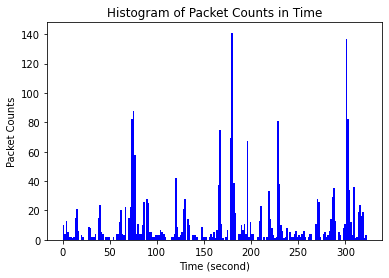

In [530]:
%matplotlib inline
import matplotlib.pyplot as plt

# YOUR CODE HERE
s =re.compile(r'\d+\.\d{6}')

time = []
for line in packets:
    if re.search(s, line) is not None:
        t = float(re.search(s, line).group(0))
        time.append(t)

plt.hist(time, bins=200, facecolor = "b")
plt.xlabel('Time (second)')
plt.ylabel('Packet Counts')
plt.title("Histogram of Packet Counts in Time")
plt.show()

## 3 Retrieving Data from the Web (7 points)
In this problem, we'll scrape data from Wikipedia using __BeautifulSoup__. Documentation for BeauitfulSoup can be found at https://www.crummy.com/software/BeautifulSoup/bs4/doc/. As mentioned in lecture, there is another package, called __requests__, which is becoming quite popular, which you are welcome to use for this problem instead, if you wish. Documentation for the `requests` package can be found at http://docs.python-requests.org/en/master/.

Suppose you are trying to choose a city to vacation in. A major factor in your decision is weather. Conveniently, lots of weather information is present in the Wikipedia articles for most world cities. Your job in this problem is to use __BeautifulSoup__ to retrieve weather information from Wikipedia articles. 

**Note:** In practice, such information is typically more easily obtained from, for example, the National Oceanic and Atmospheric Administration (NOAA), in the case of cities in the United States, and from analogous organizations in other countries.


**Note:** For the purposes of this problem, you may want to learn a bit about the structure of HTML tables by looking at the resources available on these websites:
 - https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table
 - https://www.w3schools.com/html/html_tables.asp
 - https://www.w3.org/TR/html401/struct/tables.html

### Part 1 (2 points) 

Look at a few Wikipedia pages corresponding to cities. For example:
 - https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan
 - https://en.wikipedia.org/wiki/Buenos_Aires
 - https://en.wikipedia.org/wiki/Harbin

Note that most city pages include a table titled something like "Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY)". 
 
**Use the Wikipedia page for _Ann Arbor, Michigan_**. In your jupyter notebook, open the URL and read the HTML using either `urllib` or `requests`, and parse it with `BeautifulSoup` using the standard parser, `html.parser`. 
Have a look at the parsed HTML and find the climate data table (there should only be one such table), which will have the tag `table` and will contain a child tag `th` containing a string similar to

```
 Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY)}.
```

Find the node in the `BeautifulSoup` object corresponding to this table. Store the number of children of this table in a variable `num_children`. How many children does the first child of this table have? Store it in a variable called `num_child_children`, what are the tags of these children (take a look at the `.name` attribute)?  Store in a variable call `tag`. 

**Note:** You might find that the character `"\n"` is listed as one of the climate table's children. You should exclude this child completely from all your calculations. 

In [531]:
# Use this cell to explore the URLs and climate data,
# creating the variables mentioned above.
import urllib.request
import re
from bs4 import BeautifulSoup

# YOUR CODE HERE
aa = urllib.request.urlopen('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan')
aa_parsed = BeautifulSoup(aa, 'html.parser')
# aa_parsed

s = re.compile(r'Climate data for')
obj = None
for t in aa_parsed.find_all('table'):
    if s.search(t.get_text()) is not None:
        obj = t
# print(obj)

children = [o for o in obj.children]
num_children = len(children)

child = children[1]
child_c = [o for o in child.children if o.name is not None]  # 2
num_child_children = len(child_c)
tag = [o.name for o in child.children if o.name is not None][0]

In [532]:
assert type(num_children) == int

In [533]:
assert type(num_child_children) == int
assert type(tag) == str
num_child_children > 3

True

### Part 2 (3 points) 
Write a function `retrieve_climate_table` that takes as its only argument a Wikipedia URL, and returns the `BeautifulSoup` object corresponding to the climate data table (if it exists in the page) and returns `None` if no such table exists on the page. You should check that the URL is retrieved successfully, and raise an error if `urllib2` fails to successfully read the website. 

You may notice that some city pages include more than one climate data table or several nested tables (see, for example, https://en.wikipedia.org/wiki/Los_Angeles). In this case, for ease of grading, please return the **first** table found as a `BeautifulSoup` object. 

__Note:__ a good way to check for edge cases is to test your script on the Wikipedia pages for a few of your favorite cities. The pages for Los Angeles, Hyderabad and Boston will give good examples of edge cases that you should be able to handle. 

__Hint:__ make use of the __contents__ attribute of the __BeautifulSoup__ objects and the ability to change the elements of the contents list to Unicode.

In [534]:
def retrieve_climate_table(URL):
    # YOUR CODE HERE
    try:
        city = urllib.request.urlopen(URL)
        city_parsed = BeautifulSoup(city, 'html.parser')
        s = re.compile(r'Climate data for')
        for t in city_parsed.find_all('table'):
            if s.search(t.get_text()) is not None:
                return t
        return None
    except Exception:
        raise TypeError('Please check your URL.')


In [535]:
t = retrieve_climate_table('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan')
assert 'Climate data for Ann Arbor, Michigan' in t.text

In [536]:
t = retrieve_climate_table(
    'https://en.wikipedia.org/wiki/Buenos_Aires'
)
assert 'Climate data for Buenos Aires' in t.text

In [537]:
try:
    retrieve_climate_table(12)
    assert False
except TypeError:
    assert True

### Part 3 (2 points) 

As you look at some of the climate data tables, you may notice that different cities' tables contain different information. For example, not all cities include snowfall data. 

Write a function `list_climate_table_row_names` that takes as its only argument a Wikipedia URL and returns a list of the row names of the climate data table (that your function `retrieve_climate_table` obtains), or returns `None` if no such table exists. The list returned by your function should, ideally, consist solely of Python strings (either Unicode or ASCII), and should not include any `BeautifulSoup` objects or HTML. The list returned by your script should _not_ include an entry corresponding to the __Climate data for...__ row in the table. 

__Hint:__ see the `BeautifulSoup` method `get_text()`

__Second hint:__ you are looking for HTML table header (__th__) objects. The HTML attribute __scope__ is your friend here, because in the context of an HTML table it tells you when a __th__ tag is the header of a row or a column.

In [538]:
def list_climate_table_row_names(URL):
    # YOUR CODE HERE
    t = retrieve_climate_table(URL)
    if t is None:
        return None
    else:
        row = []
        for r in t.find_all("th"):
            if r.get("scope") == "row" and r.get_text() is not None:
                text = r.get_text()
                row.append(text.strip())
        return row

In [539]:
ann_arbor_url = 'https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan'
assert list_climate_table_row_names(ann_arbor_url) == [
 'Month',
 'Record high °F (°C)',
 'Average high °F (°C)',
 'Daily mean °F (°C)',
 'Average low °F (°C)',
 'Record low °F (°C)',
 'Average precipitation inches (mm)',
 'Average snowfall inches (cm)',
 'Average precipitation days (≥ 0.01 in)',
 'Average snowy days (≥ 0.1 in)']

In [540]:
not_city_url = "https://en.wikipedia.org/wiki/George_Tucker_(politician)"
assert list_climate_table_row_names(not_city_url) is None

## 4 Relational Databases and SQL (8 points)
In this problem, you'll interact with a toy SQL database using Python's built-in `sqlite3` package. Documentation can be found at https://docs.python.org/3/library/sqlite3.html. For this problem, we'll use a popular toy SQLite database, called `Chinook`, which represents a digital music collection. See the documentation at:
 
 https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

for a more detailed explanation. We'll use the `.sqlite` file `Chinook_Sqlite.sqlite`, which should have been included along with this hwk in the `hw7.zip` file. 

### Part 1 (1 points) 
Load the database using the Python `sqlite3` package. How many tables are in the database? Save the answer in the variable `n_tables`.

In [541]:
import sqlite3
conn = sqlite3.connect("Chinook_Sqlite.sqlite")
c = conn.cursor()
c.execute("SELECT * FROM sqlite_master WHERE type='table'")
t = c.fetchall()
n_tables = len(t)

In [542]:
assert type(n_tables) == int
assert n_tables > 2

### Part 2 (1 points) 
What are the names of the tables in the database? Save the answer as a list of strings, `table_names`. 

__Note:__ you should write Python `sqlite3` code to answer this; don't just look up the answer in the documentation!

In [543]:
table_names = []
# YOUR CODE HERE
conn = sqlite3.connect("Chinook_Sqlite.sqlite")
c = conn.cursor()
c.execute("SELECT name FROM sqlite_master WHERE type='table'")
t = c.fetchall()
for name in t:
    table_names.append(name[0])

In [544]:
assert type(table_names) == list
assert len(table_names) > 2
assert 'Album' in table_names and 'Employee' in table_names

### Part 3 (2 points)

Write a function `list_album_ids_by_letter` that takes as an argument a single character and returns a list of the primary keys of all the albums whose titles start with that character. Your function should ignore case, so that the inputs "a" and "A" yield the same results. 

Include error checking that raises an error in the event that the input is not a single character.

In [545]:
def list_album_ids_by_letter(s):
    # YOUR CODE HERE
    if not isinstance(s, str):
        raise TypeError("The input should be a string.")
    if len(s) != 1:
        raise ValueError("The input should be a single string.")
    else:
        conn = sqlite3.connect("Chinook_Sqlite.sqlite")
        c = conn.cursor()
        c.execute("SELECT AlbumId from Album WHERE Title LIKE '%s' COLLATE NOCASE" % (s + '%'))
        keys = c.fetchall()
        res = []
        for k in keys:
            res.append(k[0])
        return res

In [546]:
try:
    list_album_ids_by_letter('ndf')
    assert False
except ValueError:
    assert True

In [547]:
assert list_album_ids_by_letter('n') == [28, 105, 164, 173, 186, 189, 217, 338]

### Part 4 (2 points)
Write a function `list_song_ids_by_album_letter` that takes as an argument a single character and returns a list of the primary keys of all the songs whose album names begin with that letter. 

Again, your function should ignore case and perform error checking as in `list_album_ids_by_letter`. 

__Hint:__ you'll need a `JOIN` statement here. Don't forget that you can use the `cursor.description` attribute to find out about tables and the names of their columns.

In [548]:
def list_song_ids_by_album_letter(s):
    # YOUR CODE HERE
    if not isinstance(s, str):
        raise TypeError("The input should be a string.")
    if len(s) != 1:
        raise ValueError("The input should be a single string.")
    else:
        conn = sqlite3.connect("Chinook_Sqlite.sqlite")
        c = conn.cursor()
        c.execute(
            '''SELECT TrackId From Track LEFT
            JOIN Album ON Track.AlbumId=Album.AlbumId
            WHERE Album.Title LIKE '%s' COLLATE NOCASE''' % (s + '%'))
        keys = c.fetchall()
        res = []
        for k in keys:
            res.append(k[0])
        return res

In [549]:
try:
    list_song_ids_by_album_letter('ndf')
    assert False
except ValueError:
    assert True

In [550]:
assert list_song_ids_by_album_letter('z') == [3028, 3029, 3030, 3031,
                                              3032, 3033, 3034, 3035,
                                              3036, 3037]

### Part 5 (2 points)

Write a function `total_cost_by_album_letter` that takes as an argument a single character and returns the cost of buying every song whose album begins with that letter. This cost should be based on the tracks' unit prices, so that the cost of buying a set of tracks is simply the sum of the unit prices of all the tracks in the set. Assume input is always a single lower case chracter.

In [551]:
def total_cost_by_album_letter(s):
    # YOUR CODE HERE
    conn = sqlite3.connect("Chinook_Sqlite.sqlite")
    c = conn.cursor()
    c.execute(
        '''SELECT SUM(Track.UnitPrice)
        From Track LEFT JOIN Album ON Track.AlbumId=Album.AlbumId
        WHERE Album.Title LIKE '%s' COLLATE NOCASE''' % (s + '%'))
    cost = c.fetchone()
    return cost[0]

In [552]:
assert total_cost_by_album_letter('z') == 9.9

In [553]:
assert round(total_cost_by_album_letter('a'), 0) == 366